# FAKE NEWS DETECTION

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset

df_fake=pd.read_csv('Fake.csv')
df_true=pd.read_csv('True.csv')

In [3]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
df_fake.shape, df_true.shape

((23481, 4), (21417, 4))

In [6]:
df_fake.columns, df_true.columns


(Index(['title', 'text', 'subject', 'date'], dtype='object'),
 Index(['title', 'text', 'subject', 'date'], dtype='object'))

In [7]:
df_fake.dtypes, df_true.dtypes

(title      object
 text       object
 subject    object
 date       object
 dtype: object,
 title      object
 text       object
 subject    object
 date       object
 dtype: object)

In [8]:
df_fake['class']=0
df_true['class']=1

In [9]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

## Taking last 10 values for manual testing from both Datasets

In [10]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480, 23470, -1):
    df_fake.drop([i], axis=0, inplace=True)  # Removing last 10 rows of both the original dataset

In [11]:
df_true_manual_testing = df_true.tail(10)    
for i in range(21416, 21406, -1):
    df_true.drop([i], axis=0, inplace=True)

In [12]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [13]:
## merging these two datasets in single dataframe

df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv ")

In [14]:
## Merging main two datasets 
 
df_merge = pd.concat([df_fake,df_true],axis=0)
df_merge.head(10)      # displaying first 10 values after above operation

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [15]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

# Data Visualisations

In [16]:
df_merge.groupby(['subject'])['text'].count()  # we have grouped subject

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64

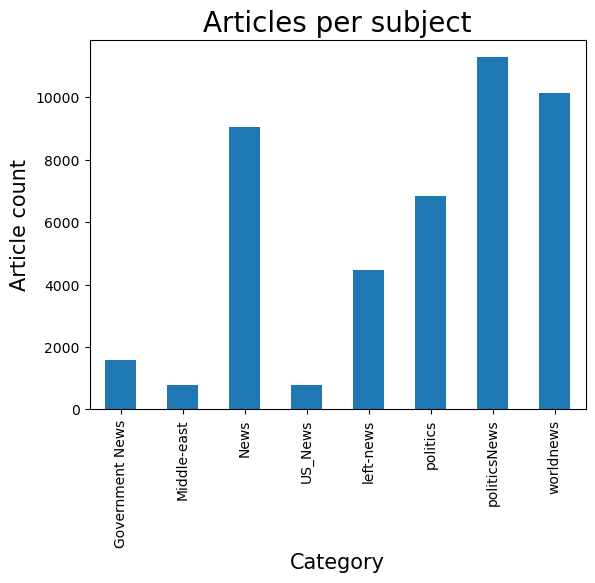

In [17]:
df_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=15)
plt.ylabel("Article count",size=15)
plt.show()

In [18]:
df_merge.groupby(['class'])['text'].count()

class
0    23471
1    21407
Name: text, dtype: int64

0 = Fake news
1 = True news


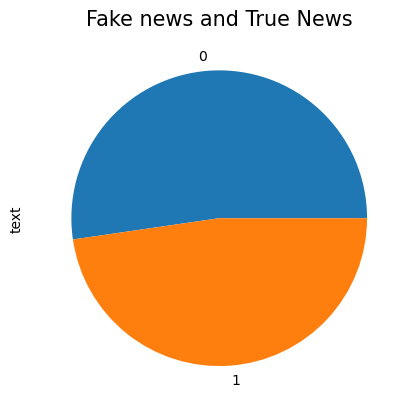

In [19]:
print("0 = Fake news\n1 = True news")
df_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=15)
plt.show()`

In [20]:
## removing 3 uncessary columns from the dataset

In [21]:
df = df_merge.drop(['title','date','subject'], axis=1)

In [22]:
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [23]:
df.isnull().sum() # to check missing values

text     0
class    0
dtype: int64

In [24]:
df= df.sample(frac=1)  # random shuffling (1- true and 0-fake)

In [25]:
df.head(10)

,text,class
17144,"RIYADH (Reuters) - Saudi Arabia, the birthplac...",1
20240,"ORLANDO, Fla. (Reuters) - After fleeing homes ...",1
10234,Remember when Chelsea Clinton faced the same s...,0
20810,BEIJING (Reuters) - China is focused on solvin...,1
20982,LONDON (Reuters) - Britain s main opposition L...,1
19592,,0
16869,TORONTO (Reuters) - Asylum seekers who illegal...,1
15259,ISTANBUL (Reuters) - Turkish police have detai...,1
6053,"CANNON BALL, N.D. (Reuters) - Tribal leaders p...",1
8755,WASHINGTON (Reuters) - U.S. Republican preside...,1


In [26]:
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace= True)

In [27]:
df.head(10)

,text,class
0,"RIYADH (Reuters) - Saudi Arabia, the birthplac...",1
1,"ORLANDO, Fla. (Reuters) - After fleeing homes ...",1
2,Remember when Chelsea Clinton faced the same s...,0
3,BEIJING (Reuters) - China is focused on solvin...,1
4,LONDON (Reuters) - Britain s main opposition L...,1
5,,0
6,TORONTO (Reuters) - Asylum seekers who illegal...,1
7,ISTANBUL (Reuters) - Turkish police have detai...,1
8,"CANNON BALL, N.D. (Reuters) - Tribal leaders p...",1
9,WASHINGTON (Reuters) - U.S. Republican preside...,1


In [28]:
## creating a filtering function to remove unwanted data from text

def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [29]:
df["text"]= df["text"].apply(filtering)
df.head(10)

,text,class
0,riyadh reuters saudi arabia the birthplac...,1
1,orlando fla reuters after fleeing homes ...,1
2,remember when chelsea clinton faced the same s...,0
3,beijing reuters china is focused on solvin...,1
4,london reuters britain s main opposition l...,1
5,,0
6,toronto reuters asylum seekers who illegal...,1
7,istanbul reuters turkish police have detai...,1
8,cannon ball n d reuters tribal leaders p...,1
9,washington reuters u s republican preside...,1


# Splitting Dataset into Training and Testing

In [30]:
# Creating Dependant and independant variables

x=df['text']
y=df['class']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

## Vectorizing the text 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorization = TfidfVectorizer()
#IDF returns numerical statics that how the word is important to the document

xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

# Classifaction using various classifers

## (i) Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)  # training or fitting the model to the training set

LogisticRegression()

In [37]:
LR.score(xv_test,y_test)  # computes the accuracy score

0.9868092691622103

In [38]:
pred_LR= LR.predict(xv_test) # Predict using the linear model

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5853
           1       0.98      0.99      0.99      5367

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [40]:
## Creating confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)  
print(cm)

[[5762   91]
 [  57 5310]]


<AxesSubplot:>

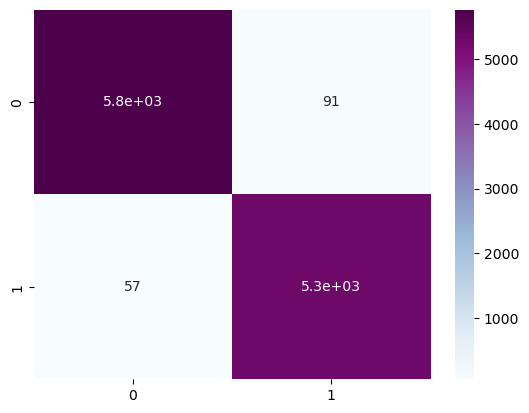

In [41]:
sns.heatmap(cm,cmap="BuPu",annot=True)

## (ii) Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [44]:
DT.score(xv_test, y_test)

0.9963458110516934

In [45]:
pred_DT = DT.predict(xv_test)

In [46]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5853
           1       1.00      1.00      1.00      5367

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [47]:
cm= confusion_matrix(y_test,pred_DT)  
print(cm)

[[5828   25]
 [  16 5351]]


<AxesSubplot:>

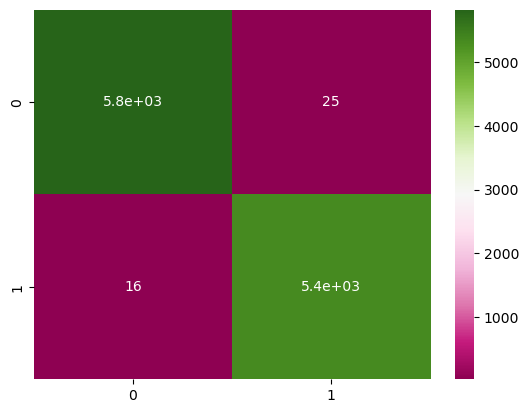

In [48]:
sns.heatmap(cm,cmap="PiYG",annot=True)

## (iii) Random Forest Classifier 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [51]:
RFC.score(xv_test, y_test)

0.9885026737967915

In [52]:
pred_RFC = RFC.predict(xv_test)

In [53]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5853
           1       0.99      0.99      0.99      5367

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [54]:
cm= confusion_matrix(y_test,pred_RFC)  
print(cm)

[[5781   72]
 [  57 5310]]


<AxesSubplot:>

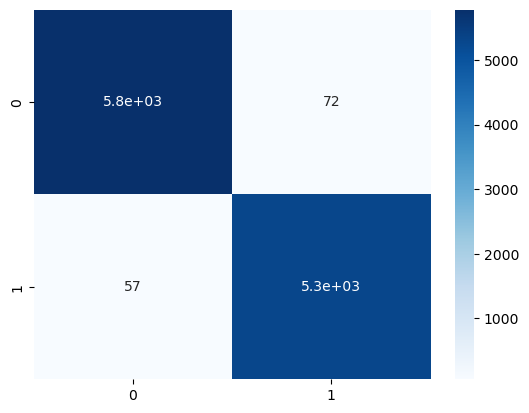

In [55]:
sns.heatmap(cm,cmap="Blues",annot=True)

## (iv) Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [60]:
GBC.score(xv_test,y_test)

0.995632798573975

In [61]:
pred_GBC = GBC.predict(xv_test)

In [62]:
print(classification_report(y_test,pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5839
           1       0.99      1.00      1.00      5381

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [63]:
cm= confusion_matrix(y_test,pred_GBC)  
print(cm)

[[5801   38]
 [  11 5370]]


<AxesSubplot:>

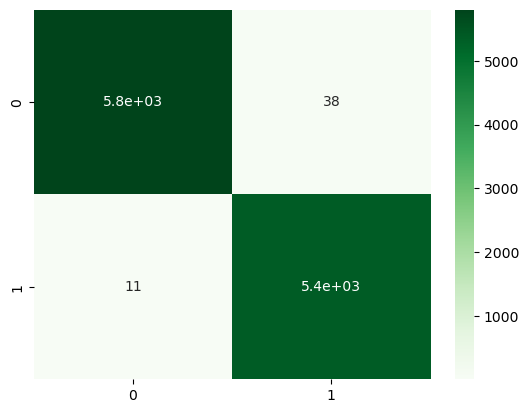

In [64]:
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True)

## (v) Naive Bayes

In [63]:
from sklearn.naive_bayes import BernoulliNB

In [66]:
NB = BernoulliNB()
NB.fit(xv_train,y_train)

BernoulliNB()

In [67]:
NB.score(xv_test,y_test)

0.943939393939394

In [68]:
pred_NB = NB.predict(xv_test)

In [69]:
print(classification_report(y_test,pred_NB))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      5853
           1       0.92      0.97      0.94      5367

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.95      0.94      0.94     11220



In [71]:
cm= confusion_matrix(y_test,pred_NB)
cm

array([[5406,  447],
       [ 182, 5185]], dtype=int64)

<AxesSubplot:>

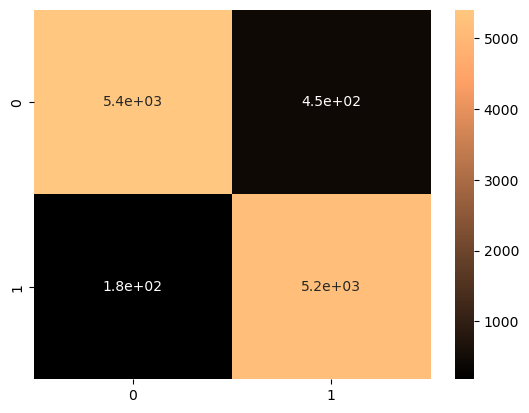

In [72]:
import seaborn as sns
sns.heatmap(cm,cmap="copper",annot=True)

## (vi) Support Vector Machine

In [73]:
from sklearn import svm

In [74]:
#Create a svm Classifier
SV = svm.SVC(kernel='linear')

#Train the model using the training sets
SV.fit(xv_train, y_train)

SVC(kernel='linear')

In [75]:
SV.score(xv_test, y_test)

0.9934046345811052

In [76]:
pred_SV = clf.predict(xv_test)

In [77]:
print(classification_report(y_test, pred_SV))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      5853
           1       0.92      0.97      0.94      5367

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.95      0.94      0.94     11220



In [78]:
cm= confusion_matrix(y_test,pred_SV)  
print(cm)

[[5406  447]
 [ 182 5185]]


<AxesSubplot:>

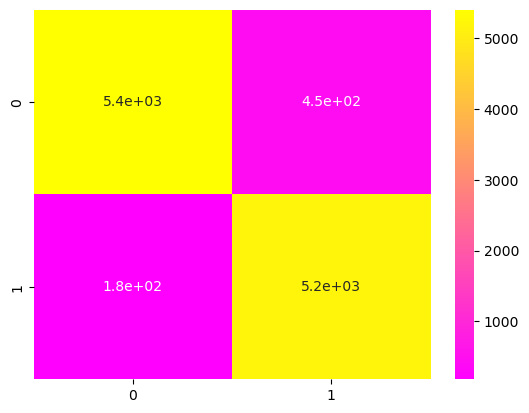

In [80]:
sns.heatmap(cm,cmap="spring",annot=True)

# K Nearest Neighbor

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xv_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [83]:
knn.score(xv_test, y_test)

0.7933155080213904

In [84]:
pred_knn = knn.predict(xv_test)

In [85]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      5853
           1       0.93      0.62      0.74      5367

    accuracy                           0.79     11220
   macro avg       0.83      0.79      0.78     11220
weighted avg       0.82      0.79      0.79     11220



In [87]:
cm= confusion_matrix(y_test,pred_knn)  
print(cm)

[[5590  263]
 [2056 3311]]


<AxesSubplot:>

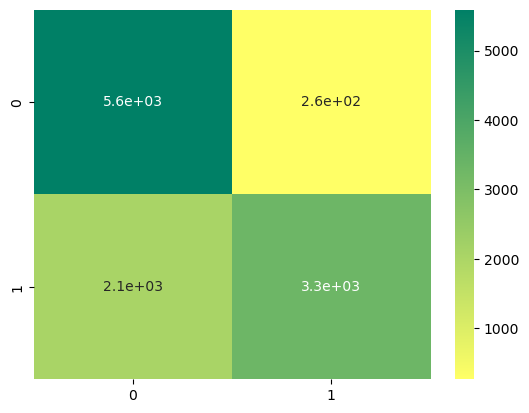

In [91]:
sns.heatmap(cm,cmap="summer_r",annot=True)